In [1]:
import matplotlib.pyplot as plt
import numpy as np 


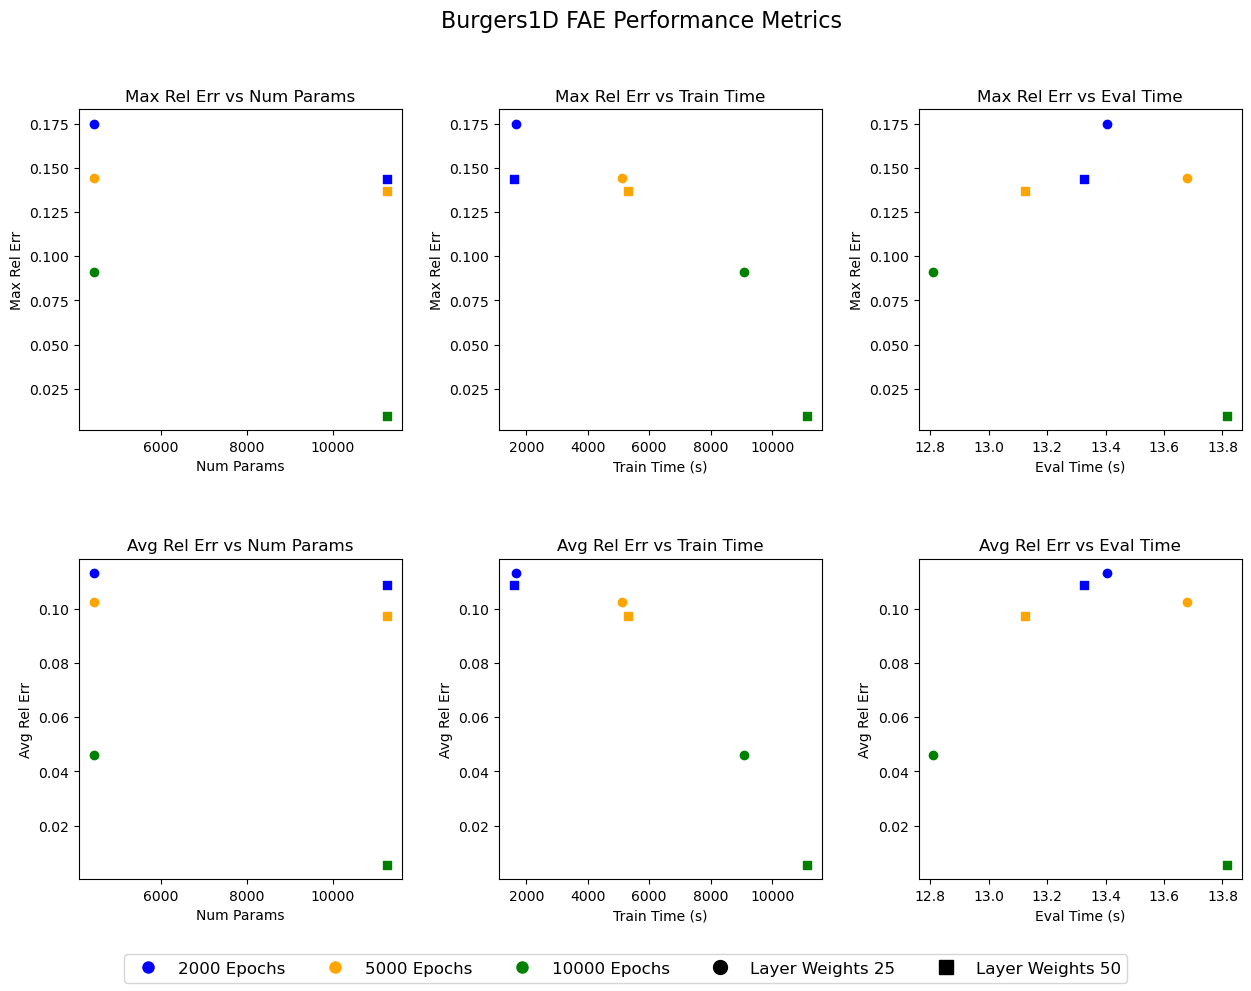

In [8]:
epochs_all = [2000, 5000, 10000]
layer_weights = [25, 50]



# Plot two rows of figures: 1. max rel err vs (num params, train_time, eval_time) and 2. avg rel err vs (num params, train_time, eval_time)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for epochs in epochs_all:
    for lw in layer_weights:
        results_file = f'burgers1d-FAE-MI{epochs}-PLD5-LW{lw}/results.npy'
        results = np.load(results_file, allow_pickle=True).item()

        # if results file contains 5000, color is blue
        # if results file contains 10000, color is orange
        if epochs == 2000: 
            color = 'blue' 
        elif epochs == 5000:
            color = 'orange'
        elif epochs == 10000:
            color = 'green'
        
        if lw == 25: 
            marker = 'o'
        elif lw == 50:
            marker = 's'

        max_rel_err = results['max_rel_err']
        avg_rel_err = results['avg_rel_err']
        num_params = results['num_params']
        train_time = results['train_time']
        eval_time = results['eval_time']

        # plot scatter point on each fig
        axs[0, 0].scatter(num_params, max_rel_err, color = color, marker=marker)
        axs[0, 1].scatter(train_time, max_rel_err, color=color, marker=marker)
        axs[0, 2].scatter(eval_time, max_rel_err, color=color, marker=marker)
        axs[1, 0].scatter(num_params, avg_rel_err, color=color, marker=marker)
        axs[1, 1].scatter(train_time, avg_rel_err, color=color, marker=marker)
        axs[1, 2].scatter(eval_time, avg_rel_err, color=color, marker=marker)

axs[0,0].set_xlabel('Num Params')
axs[0,1].set_xlabel('Train Time (s)')
axs[0,2].set_xlabel('Eval Time (s)')
axs[1,0].set_xlabel('Num Params')
axs[1,1].set_xlabel('Train Time (s)')
axs[1,2].set_xlabel('Eval Time (s)')
axs[0,0].set_ylabel('Max Rel Err')
axs[0,1].set_ylabel('Max Rel Err')
axs[0,2].set_ylabel('Max Rel Err')
axs[1,0].set_ylabel('Avg Rel Err')
axs[1,1].set_ylabel('Avg Rel Err')
axs[1,2].set_ylabel('Avg Rel Err')
axs[0,0].set_title('Max Rel Err vs Num Params')
axs[0,1].set_title('Max Rel Err vs Train Time')
axs[0,2].set_title('Max Rel Err vs Eval Time')
axs[1,0].set_title('Avg Rel Err vs Num Params')
axs[1,1].set_title('Avg Rel Err vs Train Time')
axs[1,2].set_title('Avg Rel Err vs Eval Time')

# add space between rows
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.3)
# legend for colors
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='2000 Epochs', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='5000 Epochs', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='10000 Epochs', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Layer Weights 25', markerfacecolor='k', markeredgecolor='k', markersize=10),
    plt.Line2D([0], [0], marker='s', color='w', label='Layer Weights 50', markerfacecolor='k', markeredgecolor='k', markersize=10)
]

# Title
fig.suptitle('Burgers1D FAE Performance Metrics', fontsize=16)
# legend at bottom
fig.legend(handles=handles, loc='lower center', ncol=5, fontsize=12)


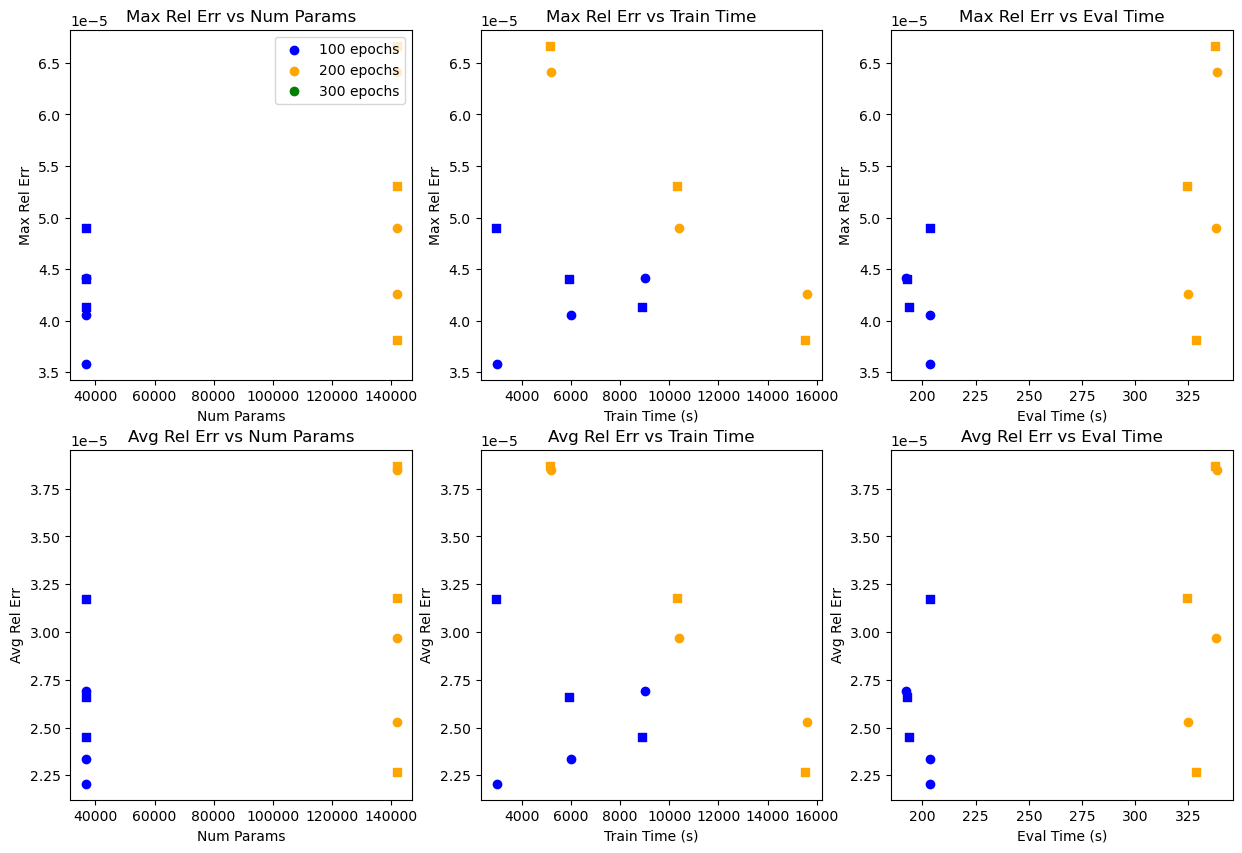

In [4]:
path_to_FNO_results = '../../../low-data-regime/FNO/experiments/burgers1d/pareto-experiments/' 
epochs_all = [100, 200, 300]
batch_sizes = [25, 50]
widths = [16, 32]
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
ticker = 0
for epochs in epochs_all:
    for batch_size in batch_sizes:
        for width in widths: 
            dir_name = f'burgers1d-E{epochs}-BS{batch_size}-FW{width}/'
            results = np.load(path_to_FNO_results + dir_name + 'results_dict.npy', allow_pickle=True).item()
            max_rel_err = results['max_rel_err']/100
            avg_rel_err = results['avg_rel_err']/100
            num_params = results['num_params']
            train_time = results['train_time']
            eval_time = results['eval_time']
            # print('dir_name, num_params, max_rel_err, avg_rel_err, train_time, eval_time', dir_name, num_params, max_rel_err, avg_rel_err, train_time, eval_time)

            if batch_size == 25:
                marker = 'o'
            else: marker = 's'

            if width == 16:
                color = 'blue'
            elif width == 32:
                color = 'orange'
            else: color = 'green'



            axs[0, 0].scatter(num_params, max_rel_err, color=color, marker=marker)
            axs[0, 1].scatter(train_time, max_rel_err, color=color, marker=marker)
            axs[0, 2].scatter(eval_time, max_rel_err, color=color, marker=marker)
            axs[1, 0].scatter(num_params, avg_rel_err, color=color, marker=marker)
            axs[1, 1].scatter(train_time, avg_rel_err, color=color, marker=marker)
            axs[1, 2].scatter(eval_time, avg_rel_err, color=color, marker=marker)

axs[0,0].set_xlabel('Num Params')
axs[0,1].set_xlabel('Train Time (s)')
axs[0,2].set_xlabel('Eval Time (s)')
axs[1,0].set_xlabel('Num Params')
axs[1,1].set_xlabel('Train Time (s)')
axs[1,2].set_xlabel('Eval Time (s)')
axs[0,0].set_ylabel('Max Rel Err')
axs[0,1].set_ylabel('Max Rel Err')
axs[0,2].set_ylabel('Max Rel Err')
axs[1,0].set_ylabel('Avg Rel Err')
axs[1,1].set_ylabel('Avg Rel Err')
axs[1,2].set_ylabel('Avg Rel Err')
axs[0,0].set_title('Max Rel Err vs Num Params')
axs[0,1].set_title('Max Rel Err vs Train Time')
axs[0,2].set_title('Max Rel Err vs Eval Time')
axs[1,0].set_title('Avg Rel Err vs Num Params')
axs[1,1].set_title('Avg Rel Err vs Train Time')
axs[1,2].set_title('Avg Rel Err vs Eval Time')
# legend for colors
axs[0, 0].scatter([], [], color='blue', label='100 epochs')
axs[0, 0].scatter([], [], color='orange', label='200 epochs')
axs[0, 0].scatter([], [], color='green', label='300 epochs')
axs[0, 0].legend(loc='upper right')

            
            

### Plot both together

dir_name, num_params, max_rel_err, avg_rel_err, train_time, eval_time burgers1d-NA-MI5000-HU25.npy 51.356 10.403930395841599 2.9334498839685166 27.011869498093922 0.31971612373987834
dir_name, num_params, max_rel_err, avg_rel_err, train_time, eval_time burgers1d-NA-MI5000-HU50.npy 101.706 6.90186619758606 1.8429347154496412 30.925231337547302 0.30953360001246133
dir_name, num_params, max_rel_err, avg_rel_err, train_time, eval_time burgers1d-NA-MI20000-HU150.npy 303.106 0.4417251329869032 0.2335083703911713 187.25254753430684 0.2933040897051493
dir_name, num_params, max_rel_err, avg_rel_err, train_time, eval_time burgers1d-NA-MI5000-HU100.npy 202.406 2.2202888503670692 0.8009265603544085 34.57793261607488 0.3105923453966776
dir_name, num_params, max_rel_err, avg_rel_err, train_time, eval_time burgers1d-NA-MI10000-HU100.npy 202.406 1.5849322080612183 0.6005845703142368 68.38877912362416 0.33226988712946576
dir_name, num_params, max_rel_err, avg_rel_err, train_time, eval_time burgers1d-NA

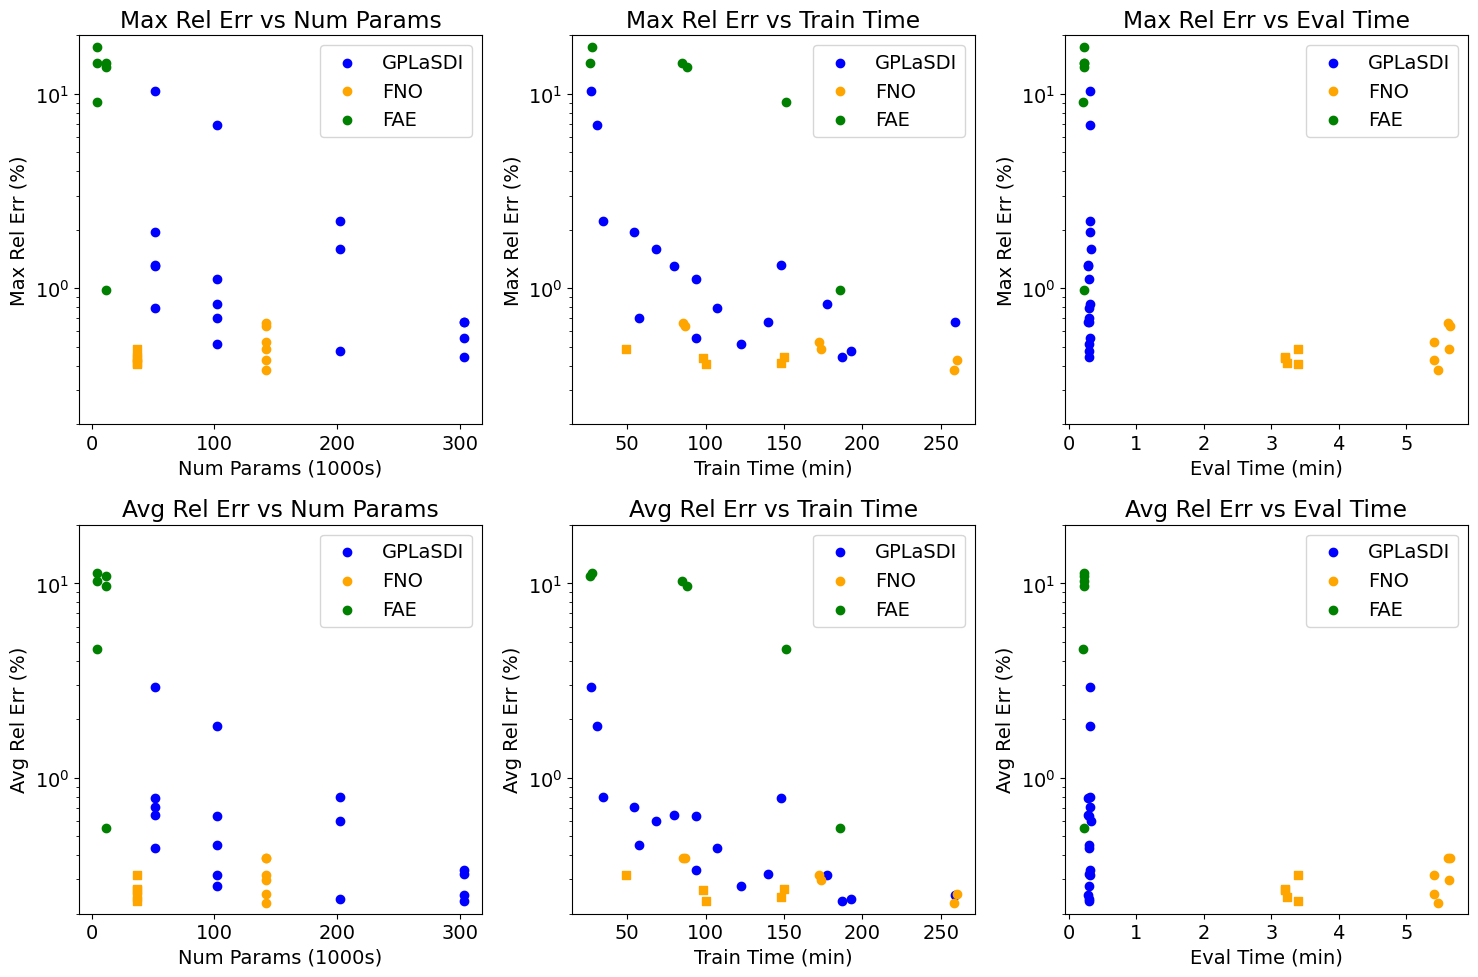

In [11]:
GPLaSDI_results_files = ["burgers1d-NA-MI5000-HU25.npy", "burgers1d-NA-MI5000-HU50.npy", "burgers1d-NA-MI20000-HU150.npy", "burgers1d-NA-MI5000-HU100.npy","burgers1d-NA-MI10000-HU100.npy","burgers1d-NA-MI10000-HU150.npy","burgers1d-NA-MI10000-HU25.npy","burgers1d-NA-MI10000-HU50.npy","burgers1d-NA-MI15000-HU25.npy","burgers1d-NA-MI15000-HU50.npy","burgers1d-NA-MI20000-HU50.npy","burgers1d-NA-MI20000-HU25.npy","burgers1d-NA-MI15000-HU150.npy", "burgers1d-NA-MI27800-HU50.npy", "burgers1d-NA-MI27800-HU150.npy", "burgers1d-NA-MI27800-HU100.npy", "burgers1d-NA-MI27800-HU25.npy"]

# make all fonts bigger
plt.rcParams.update({'font.size': 14})

# Plot two rows of figures: 1. max rel err vs (num params, train_time, eval_time) and 2. avg rel err vs (num params, train_time, eval_time)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
color = 'blue'
for results_file in GPLaSDI_results_files:
    file_path = '../pareto-experiments/' + results_file
    results = np.load(file_path, allow_pickle=True).item()

    # if results file contains 5000, color is blue
    # if results file contains 10000, color is orange

    max_rel_err = results['max_rel_err']*100
    avg_rel_err = results['avg_rel_err']*100
    num_params = results['num_params']/1000
    train_time = results['train_time']/60
    eval_time = results['eval_time']/60

    print('dir_name, num_params, max_rel_err, avg_rel_err, train_time, eval_time', results_file, num_params, max_rel_err, avg_rel_err, train_time, eval_time)
    # plot scatter point on each fig
    axs[0, 0].scatter(num_params, max_rel_err, color = color)
    axs[0, 1].scatter(train_time, max_rel_err, color=color)
    axs[0, 2].scatter(eval_time, max_rel_err, color=color)
    axs[1, 0].scatter(num_params, avg_rel_err, color=color)
    axs[1, 1].scatter(train_time, avg_rel_err, color=color)
    axs[1, 2].scatter(eval_time, avg_rel_err, color=color)

path_to_FNO_results = '../../../low-data-regime/FNO/experiments/burgers1d/pareto-experiments/' 
epochs_all = [100, 200, 300]
batch_sizes = [25, 50]
widths = [16,32]
ticker = 0
color = 'orange'
for epochs in epochs_all:
    for batch_size in batch_sizes:
        for width in widths: 
            if not (ticker == 0):
                dir_name = f'burgers1d-E{epochs}-BS{batch_size}-FW{width}/'
                results = np.load(path_to_FNO_results + dir_name + 'results_dict.npy', allow_pickle=True).item()
                max_rel_err = results['max_rel_err']*100
                avg_rel_err = results['avg_rel_err']*100
                num_params = results['num_params']/1000
                train_time = results['train_time']/60
                eval_time = results['eval_time']/60
                # print('dir_name, num_params, max_rel_err, avg_rel_err, train_time, eval_time', dir_name, num_params, max_rel_err, avg_rel_err, train_time, eval_time)
                if width == 16:
                    marker = 's'
                else: marker = 'o'
                if avg_rel_err < 10 and max_rel_err < 30:
                    axs[0, 0].scatter(num_params, max_rel_err, color=color, marker=marker)
                    axs[0, 1].scatter(train_time, max_rel_err, color=color, marker=marker)
                    axs[0, 2].scatter(eval_time, max_rel_err, color=color, marker=marker)
                    axs[1, 0].scatter(num_params, avg_rel_err, color=color, marker=marker)
                    axs[1, 1].scatter(train_time, avg_rel_err, color=color, marker=marker)
                    axs[1, 2].scatter(eval_time, avg_rel_err, color=color, marker=marker)
            else: 
                pass
            ticker += 1

# Add FAE results
epochs_all = [2000, 5000, 10000]
layer_weights = [25, 50]
for epochs in epochs_all:
    for lw in layer_weights: 
        results_file = f'burgers1d-FAE-MI{epochs}-PLD5-LW{lw}/results.npy'
        results = np.load(results_file, allow_pickle=True).item()

        max_rel_err = results['max_rel_err']*100
        avg_rel_err = results['avg_rel_err']*100
        num_params = results['num_params']/1000
        train_time = results['train_time']/60
        eval_time = results['eval_time']/60

        # plot scatter point on each fig
        axs[0, 0].scatter(num_params, max_rel_err, color = 'green')
        axs[0, 1].scatter(train_time, max_rel_err, color='green')
        axs[0, 2].scatter(eval_time, max_rel_err, color='green')
        axs[1, 0].scatter(num_params, avg_rel_err, color='green')
        axs[1, 1].scatter(train_time, avg_rel_err, color='green')
        axs[1, 2].scatter(eval_time, avg_rel_err, color='green')


axs[0,0].set_xlabel('Num Params (1000s)')
axs[0,1].set_xlabel('Train Time (min)')
axs[0,2].set_xlabel('Eval Time (min)')
axs[1,0].set_xlabel('Num Params (1000s)')
axs[1,1].set_xlabel('Train Time (min)')
axs[1,2].set_xlabel('Eval Time (min)')
axs[0,0].set_ylabel('Max Rel Err (%)')
axs[0,1].set_ylabel('Max Rel Err (%)')
axs[0,2].set_ylabel('Max Rel Err (%)')
axs[1,0].set_ylabel('Avg Rel Err (%)')
axs[1,1].set_ylabel('Avg Rel Err (%)')
axs[1,2].set_ylabel('Avg Rel Err (%)')
axs[0,0].set_title('Max Rel Err vs Num Params')
axs[0,1].set_title('Max Rel Err vs Train Time')
axs[0,2].set_title('Max Rel Err vs Eval Time')
axs[1,0].set_title('Avg Rel Err vs Num Params')
axs[1,1].set_title('Avg Rel Err vs Train Time')
axs[1,2].set_title('Avg Rel Err vs Eval Time')



# Legend on each axis
for i in range(2):
    for j in range(3):
        axs[i, j].scatter([], [], color='blue', label='GPLaSDI')
        axs[i, j].scatter([], [], color='orange', label='FNO')
        axs[i, j].scatter([], [], color='green', label='FAE')
        axs[i, j].legend(loc='upper right')

        # error log scale
        axs[i, j].set_yscale('log')
        # set range 10^-1 to 1.1e1
        axs[i, j].set_ylim(0.2, 20)
plt.tight_layout()




### FNO Autoencoder Small Batch (100 epochs) result (verification)
